# 🚢 Logistic Regression on Titanic Dataset – Survival Prediction

### 🎯 Objective:
Predict whether a passenger survived the Titanic disaster based on their **Age** and **Fare** using Logistic Regression.

### 📂 Dataset:
Titanic dataset (Kaggle or CSV), with target variable **Survived** (0 = No, 1 = Yes).

---

✅ Logistic Regression model  
✅ Accuracy & classification report  
✅ 3D decision boundary plot  
✅ Model saved using Joblib  


## 1. Important Libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from mpl_toolkits.mplot3d import Axes3D

## 2. Loading dataset

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


## 3. Separating the Independent Variable and Dependent Variable

In [4]:
X=df[['Age','Fare']]
y=df['Survived']

## 4. Separating Training and Testing Dataset 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 5. Treat Missing values through Knn Imputer

In [7]:
from sklearn.impute import KNNImputer 

In [8]:
knn = KNNImputer(n_neighbors=3,weights='distance')

In [9]:
X_train_impute = knn.fit_transform(X_train)
X_test_impute = knn.transform(X_test)

In [10]:
X_train_impute.shape

(712, 2)

In [11]:
X_train_impute

array([[ 45.5   ,  28.5   ],
       [ 23.    ,  13.    ],
       [ 32.    ,   7.925 ],
       ...,
       [ 41.    ,  14.1083],
       [ 14.    , 120.    ],
       [ 21.    ,  77.2875]], shape=(712, 2))

In [12]:
X_test_impute

array([[ 29.        ,  15.2458    ],
       [ 31.        ,  10.5       ],
       [ 20.        ,   7.925     ],
       [  6.        ,  33.        ],
       [ 14.        ,  11.2417    ],
       [ 26.        ,  78.85      ],
       [ 31.66666667,   7.75      ],
       [ 16.        ,  18.        ],
       [ 16.        ,   7.75      ],
       [ 19.        ,  26.2833    ],
       [ 37.        ,  53.1       ],
       [ 44.        ,   8.05      ],
       [ 40.47623049,  25.4667    ],
       [ 30.        ,   7.225     ],
       [ 36.        ,  13.        ],
       [ 16.        ,  39.4       ],
       [ 42.        ,  52.5542    ],
       [ 33.33333333,   7.8292    ],
       [ 27.        ,  13.        ],
       [ 47.        ,  52.        ],
       [ 24.        ,   7.8958    ],
       [ 34.        ,  26.55      ],
       [ 19.        ,   7.8542    ],
       [ 20.        ,   9.225     ],
       [ 30.        ,  14.5       ],
       [ 10.        ,  27.9       ],
       [ 40.        ,  27.7208    ],
 

## 6. Scatter plot: Fare vs Survived



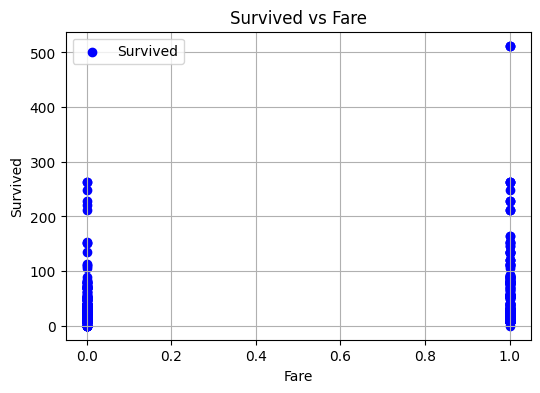

In [26]:
# Scatter plot: Fare vs Survived
plt.figure(figsize=(6, 4))
plt.scatter(df['Survived'], df['Fare'], color='blue', label='Survived')
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.title("Survived vs Fare")
plt.legend()
plt.grid(True)
plt.show()



## 7. Scatter plot: Age vs Survived



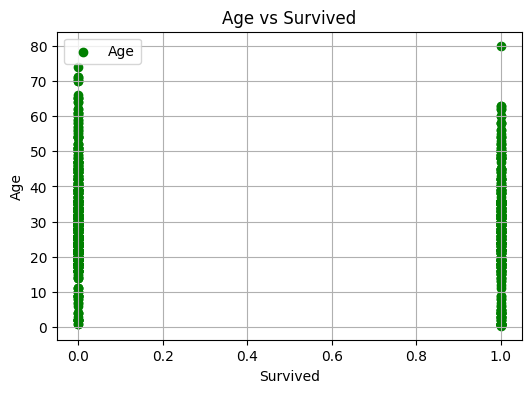

In [27]:
# Scatter plot: Age vs Survived
plt.figure(figsize=(6, 4))
plt.scatter(df['Survived'], df['Age'], color='green', label='Age')
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age vs Survived")
plt.legend()
plt.grid(True)
plt.show()


## 8. Scaling the Input Variable(values)

In [40]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_impute)
X_test_scaled = scaler.transform(X_test_impute)

In [56]:
X_train_scaled 

array([[ 1.18295401, -0.07868358],
       [-0.48490967, -0.37714494],
       [ 0.1822358 , -0.47486697],
       ...,
       [ 0.84938127, -0.35580399],
       [-1.15205515,  1.68320121],
       [-0.63316422,  0.86074761]], shape=(712, 2))

In [57]:
X_test_scaled

array([[-4.01460244e-02, -3.33900778e-01],
       [ 1.08108526e-01, -4.25283869e-01],
       [-7.07291499e-01, -4.74866965e-01],
       [-1.74507335e+00,  7.96648968e-03],
       [-1.15205515e+00, -4.11002011e-01],
       [-2.62527849e-01,  8.90834443e-01],
       [ 1.57526709e-01, -4.78236690e-01],
       [-1.00380060e+00, -2.80867083e-01],
       [-1.00380060e+00, -4.78236690e-01],
       [-7.81418774e-01, -1.21367407e-01],
       [ 5.52872175e-01,  3.95003477e-01],
       [ 1.07176310e+00, -4.72460019e-01],
       [ 8.10555669e-01, -1.37091507e-01],
       [ 3.39812506e-02, -4.88345865e-01],
       [ 4.78744900e-01, -3.77144940e-01],
       [-1.00380060e+00,  1.31202147e-01],
       [ 9.23508550e-01,  3.84493786e-01],
       [ 2.81072167e-01, -4.76711649e-01],
       [-1.88400574e-01, -3.77144940e-01],
       [ 1.29414492e+00,  3.73822348e-01],
       [-4.10782399e-01, -4.75429228e-01],
       [ 3.30490350e-01, -1.16231946e-01],
       [-7.81418774e-01, -4.76230260e-01],
       [-7.

## 9. Train the Model using Logistic Regession

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [46]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(X_test_scaled)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

## 10. Check Accuracy

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       105
           1       0.76      0.22      0.34        74

    accuracy                           0.65       179
   macro avg       0.70      0.58      0.55       179
weighted avg       0.69      0.65      0.59       179



In [51]:
print(type(X_train))
print(X_train.shape)

print(type(y_train))
print(y_train.shape)


<class 'numpy.ndarray'>
(712, 2)
<class 'numpy.ndarray'>
(712,)


## 11. To see Decision boundar lIne

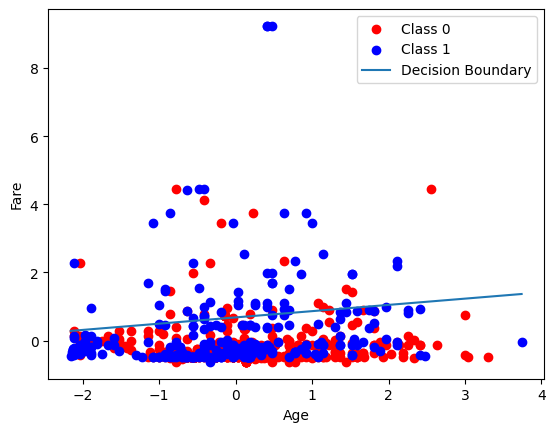

In [55]:
plt.scatter(X_train_scaled[y_train==0][:,0], X_train_scaled[y_train==0][:,1], color='red', label='Class 0')
plt.scatter(X_train_scaled[y_train==1][:,0], X_train_scaled[y_train==1][:,1], color='blue', label='Class 1')

x_values = np.linspace(X_train_scaled[:,0].min(), X_train_scaled[:,0].max(), 100)
coef = lr.coef_[0]
intercept = lr.intercept_

y_values = -(coef[0] * x_values + intercept) / coef[1]

plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

## 12. To save The model using Joblib

In [59]:
import joblib

# model train karne ke baad
joblib.dump(lr, 'logistic_model.pkl')


['logistic_model.pkl']